

Exercises and solutions for 
[Applied RL with RLlib](https://applied-rl-course.netlify.app/). 
The exercises found here are immediately followed by their solutions.


**NOTE: You must run the top cells to initialize before running the exercises!**
Keep this notebook open if you want to run multiple exercises without having to 
re-initialize. If for some reason this notebook can't request the required resources 
for Ray to run, please consider restarting the Colab Runtime and trying again.

In [7]:
# RUN THESE THREE CELLS FIRST
! pip install ray[rllib]==2.2.0 torch matplotlib 
! pip install gym==0.23.1 gym-toytext==0.25.0 pygame==2.1.0

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached distlib-0.3.8-py2.py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/20.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/20.8 MB 16.5 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/20.8 MB 11.1 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/20.8 MB 11.1 MB/s eta 0:00:02
   -- ------------------------------------- 1.1/20.8 MB 6.5 MB/s eta 0:00:04
   -- ------------------------------------- 1.3/20.8 MB 5.4 MB/s eta 0:00:04
   -- ------------------------------------- 1.3/20.8 MB 4.7 MB/s eta 0:00:05
   -- ------------------------------------- 1.3/20.8 MB 4.7 MB/s eta 0:00:05
   -- ------------------------------------- 1.5/20.8 MB 3.8 MB/s eta 0:00:06
   --- ------------------------------------ 1.6/20.8 MB 3.7 MB/s eta 0:00:06
   --- ------------------------------------ 1.8/20.8 MB 3.8 MB/s eta 0:00:06
   --- ------------------

  You can safely remove it manually.


In [ ]:
# RUN THESE THREE CELLS FIRST
!git clone https://github.com/maxpumperla/rl-course-exercises

In [ ]:
# RUN THESE THREE CELLS FIRST
%cp -r rl-course-exercises/utils.py .
%cp -r rl-course-exercises/envs.py .

%cp -r rl-course-exercises/data .
%cp -r rl-course-exercises/models .

In [ ]:

# exercise number 3 from module 1
from ray.rllib.algorithms.ppo import PPO
from utils import slippery_algo_config
import gym
from IPython import display
import time
import numpy as np

ppo = PPO(env="FrozenLake-v1", config=slippery_algo_config)
ppo.restore("models/FrozenLakeSlippery50/checkpoint_000050/")

env = gym.make("FrozenLake-v1", is_slippery=True)
from utils import fix_frozen_lake_render
fix_frozen_lake_render(env)

obs = env.reset()

# The player behaves randomly by default.
# To use a player that learned how to play using RL, change this to True!
USE_RL = False

done = False
while not done:
    if USE_RL:
        action = ppo.compute_single_action(obs, explore=False)
    else:
        action = env.action_space.sample()
    obs, reward, done, _ = env.step(action)

    display.clear_output(wait=True)
    env.render()
    time.sleep(0.25)
    
if reward == 1:
    print("Success!")
else:
    print("Agent failed to reach the goal :(")
    
ppo.stop()

In [ ]:

# exercise number 7 from module 1

import gym
import numpy as np
np.random.seed(1)
env = gym.make("FrozenLake-v1", 
               desc=gym.envs.toy_text.frozen_lake.generate_random_map(size=3, p=0.3), 
               is_slippery=False)
env.render = None

obs = env.reset()
actions = [____]
for action in actions:
    obs, reward, done, _ = env.step(action)
    print("Obs:", obs, "Reward:", reward, "Done:", done)

In [1]:

# solution for exercise number 7 from module 1

import gym.envs.toy_text
import numpy as np
np.random.seed(1)
env = gym.make("FrozenLake-v1", desc=gym.envs.toy_text.frozen_lake.generate_random_map(size=3, p=0.3), is_slippery=False)
env.render = None

obs = env.reset()
actions = [1,2,1,2]
for action in actions:
    obs, reward, done, _ = env.step(action)
    print("Obs:", obs, "Reward:", reward, "Done:", done)

Obs: 3 Reward: 0.0 Done: False
Obs: 4 Reward: 0.0 Done: False
Obs: 7 Reward: 0.0 Done: False
Obs: 8 Reward: 1.0 Done: True


c:\Users\frm19\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\wrappers\monitoring\video_recorder.py:9: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.spawn


In [1]:

# exercise number 10 from module 1

import gym
import numpy as np

env = gym.make("FrozenLake-v1", is_slippery=True)

rewards = []
N = 1000

for i in range (N): # loop over N episodes

    obs = env.reset()
    done = False
    
    while not done:
        action = np.random.randint(low=0, high=4)
        obs, reward, done, _ = env.step(action)
    
    rewards.append(reward)
    
print("Average reward:", sum(rewards)/N)

Average reward: 0.013


c:\Users\frm19\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\wrappers\monitoring\video_recorder.py:9: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.spawn


In [3]:

# solution for exercise number 10 from module 1

import gym
import numpy as np

env = gym.make("FrozenLake-v1", is_slippery=True)

rewards = []
N = 1000

for i in range(N): # loop over N episodes

    obs = env.reset()
    done = False
    
    while not done:
        action = np.random.randint(low=0, high=4)
        obs, reward, done, _ = env.step(action)
    
    rewards.append(reward)
    
print("Average reward:", sum(rewards)/N)

Average reward: 0.018


In [4]:

# exercise number 11 from module 1

import gym

env = gym.make("FrozenLake-v1", is_slippery=True)

# Your task: modify this dictionary
policy = {
    0 : 0,
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10: 0,
    11: 0,
    12: 0,
    13: 0,
    14: 0,
    15: 0
}

rewards = []
N = 1000
for i in range(N): # loop over N episodes

    obs = env.reset()
    done = False
    
    while not done:
        action = policy[obs]
        obs, reward, done, _ = env.step(action)
    
    rewards.append(reward)
    
print("Average reward:", sum(rewards)/N)

Average reward: 0.0


#### Hand-crafted policy

For discrete observation spaces, a (deterministic) policy can be defined with a Python dictionary that maps from observations to actions. 

The code below loasd the (non-deterministic) sliperry Frozen Lake environment. The code loops over 1000 episodes using the policy defined in the dictionary. Within each episode, it iterates through time steps (observations and actions) until the episode is done and a reward is achieved. It then prints the average reward over the 1000 episodes. It currently gets an average reward of 0, which makes sense beacuse the policy is telling it to always move left, which mean it will never reach the goal. (If you try to move left you may slip up or down, but never right, and moving is right is needed to reach the goal.)


In [3]:

# solution for exercise number 11 from module 1

import gym

env = gym.make("FrozenLake-v1", is_slippery=True)

policy = {
    0 : 2,
    1 : 2,
    2 : 2,
    3 : 2,
    4 : 1,
    5 : 1,
    6 : 1,
    7 : 1,
    8 : 2,
    9 : 2,
    10: 2,
    11: 0,
    12: 2,
    13: 2,
    14: 2,
    15: 2
}

rewards = []
N = 1000
for i in range(N): # loop over N episodes

    obs = env.reset()
    done = False
    
    while not done:
        action = policy[obs]
        obs, reward, done, _ = env.step(action)
    
    rewards.append(reward)
    
print("Average reward:", sum(rewards)/N)

Average reward: 0.022


In [7]:
# exercise number 3 from module 2
from ray.rllib.algorithms.ppo import PPO, PPOConfig
from utils import slippery_algo_config

ppo = PPO(env="FrozenLake-v1", config=slippery_algo_config)

for i in range(10):
    train_info = ppo.train()
    
eval_results = ppo.evaluate()

print(eval_results["evaluation"]["episode_reward_mean"])

ppo.stop()

AttributeError: Cannot set attribute (env) of an already frozen AlgorithmConfig!

In [12]:
print("Action performed from top-right:", ppo.compute_single_action(3, explore=False))

Action performed from top-right: 1


In [2]:

# solution for exercise number 3 from module 2
from ray.rllib.algorithms.ppo import PPO
from utils import slippery_algo_config

ppo = PPO(env="FrozenLake-v1", config=slippery_algo_config)

for i in range(50): # There is randomness here, but 20+ should be enough most of the time
    train_info = ppo.train()
    
eval_results = ppo.evaluate()

print("Frequency of reaching goal: %.1f%%" % (eval_results["evaluation"]["episode_reward_mean"]*100))

print("Action performed from top-right:", ppo.compute_single_action(3, explore=False))

ppo.stop()

AttributeError: Cannot set attribute (env) of an already frozen AlgorithmConfig!

In [16]:

# exercise number 4 from module 2
from ray.rllib.algorithms.ppo import PPO
from utils import slippery_algo_config
import gym
from IPython import display
import time

ppo = PPO(env="FrozenLake-v1", config=slippery_algo_config)
ppo.restore("models/FrozenLakeSlippery50/checkpoint_000050/")

env = gym.make("FrozenLake-v1", is_slippery=True)
from utils import fix_frozen_lake_render
fix_frozen_lake_render(env)

obs = env.reset()
env.seed(12)

done = False
while not done:
    action = ppo.____(obs, explore=False)
    obs, rewards, done, _ = ____.step(____)

    display.clear_output(wait=True);
    env.render()
    time.sleep(0.5)
    
ppo.stop()

TypeError: AlgorithmConfig.env_runners() got an unexpected keyword argument 'horizon'

In [1]:
# exersise number 4 fro module 2

from ray.rllib.algorithms.ppo import PPO
from utils import slippery_algo_config
import gym
from IPython import display
import time

ppo = PPO(env="FrozenLake-v1", config=slippery_algo_config)
ppo.restore("models/FrozenLakeSlippery50/checkpoint_000050/")

env = gym.make("FrozenLake-v1", is_slippery=True)
from utils import fix_frozen_lake_render
fix_frozen_lake_render(env)

obs = env.reset()
env.seed(12)

done = False

while not done:
    action = ppo.compute_single_action(obs, explore=False)
    obs, rewards, done, _ = env.step(action)
    
    display.clear_output(wait=True)
    env.render()
    time.sleep(0.5)
    
ppo.stop()

  (Down)
🧊🧊🧊🧊
🧊🕳🧊🕳
🧊🧊🧊🕳
🕳🧊🧊🧑


In [2]:
env = gym.make("FrozenLake-v1", is_slippery=True)
from utils import fix_frozen_lake_render
fix_frozen_lake_render(env)

obs = env.reset()
env.seed(12)

done = False

while not done:
    action = ppo.compute_single_action(obs, explore=False)
    obs, rewards, done, _ = env.step(action)
    
    display.clear_output(wait=True)
    env.render()
    time.sleep(0.5)
    
ppo.stop()

  (Down)
🧊🧊🧊🧊
🧊🕳🧊🕳
🧊🧊🧊🕳
🕳🧊🧊🧑


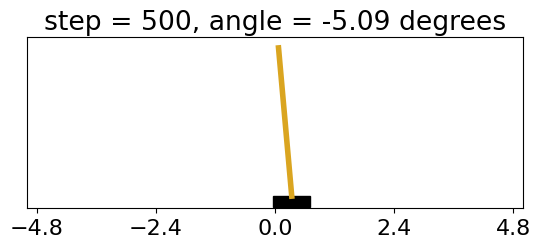

In [1]:

# exercise number 8 from module 2
import numpy as np
import time
from IPython import display

from envs import MyCartPole
from ray.rllib.algorithms.ppo import PPO, PPOConfig

config = (
    PPOConfig()
    .framework("torch")
    .rollouts(create_env_on_local_worker=True)
    .debugging(seed=0, log_level="ERROR")
    .training(model={"fcnet_hiddens" : [32,32]})
    .environment(env=MyCartPole)
)

ppo = config.build()

ppo.restore("models/CartPole-Ray2/checkpoint_000050")

env = MyCartPole()
obs = env.reset()
done = False
while not done:
    action = ppo.compute_single_action(obs)
    obs, reward, done, _ = env.step(action)

    env.render()
    time.sleep(0.01)

display.clear_output(wait=True)

ppo.stop()

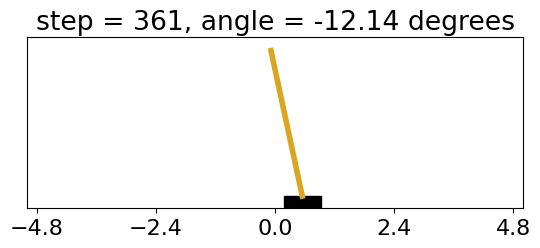

In [2]:

# solution for exercise number 8 from module 2
import numpy as np
import time
from IPython import display

from envs import MyCartPole
from ray.rllib.algorithms.ppo import PPOConfig

config = (
    PPOConfig()
    .framework("torch")
    .rollouts(create_env_on_local_worker=True)
    .debugging(seed=0, log_level="ERROR")
    .training(model={"fcnet_hiddens" : [32,32]})
    .environment(env=MyCartPole)
)

ppo = config.build()

ppo.restore("models/CartPole-Ray2/checkpoint_000050")

env = MyCartPole()
obs = env.reset()
done = False
while not done:
    action = ppo.compute_single_action(obs)
    obs, reward, done, _ = env.step(action)

    env.render()
    time.sleep(0.01)

display.clear_output(wait=True)

ppo.stop()

2024-05-24 18:40:31,922	INFO trainable.py:172 -- Trainable.setup took 20.008 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2024-05-24 18:40:31,946	WARNING util.py:66 -- Install gputil for GPU system monitoring.
2024-05-24 18:40:32,032	INFO trainable.py:790 -- Restored on 127.0.0.1 from checkpoint: models\CartPole-Ray2\checkpoint_000050
2024-05-24 18:40:32,032	INFO trainable.py:799 -- Current state after restoring: {'_iteration': 50, '_timesteps_total': None, '_time_total': 110.29570436477661, '_episodes_total': 849}


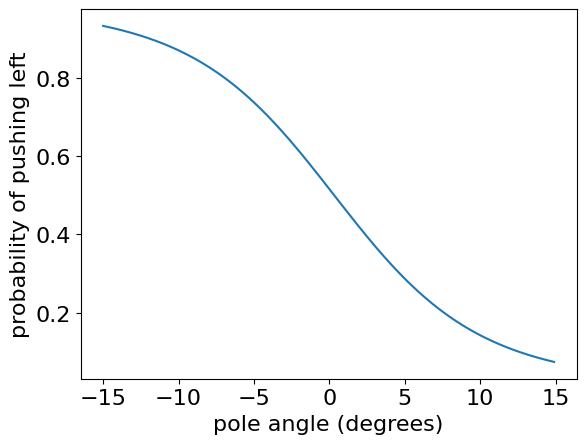

In [4]:

# exercise number 9 from module 2
import numpy as np
import matplotlib.pyplot as plt

import utils
from envs import MyCartPole
from ray.rllib.algorithms.ppo import PPOConfig

cartpole_config = (
    PPOConfig()
    .framework("torch")
    .rollouts(create_env_on_local_worker=True)
    .debugging(seed=0, log_level="ERROR")
    .training(model={"fcnet_hiddens" : [32, 32]})
    .environment(env=MyCartPole)
)

ppo = cartpole_config.build()

ppo.restore("models/CartPole-Ray2/checkpoint_000050")

angle_range_deg = np.arange(-15,15,0.1)
push_left_probs = 0*angle_range_deg

env = MyCartPole()
obs = env.reset()
for i, angle_deg in enumerate(angle_range_deg):
    angle_rad = angle_deg/180*np.pi
    
    obs = np.zeros(4)
    obs[2] = angle_rad

    push_left_probs[i] = utils.query_policy(ppo, env, obs, actions=[0,1])[0]

plt.plot(angle_range_deg, push_left_probs)
plt.xlabel("pole angle (degrees)")
plt.ylabel("probability of pushing left")

ppo.stop()

In [7]:

# exercise number 13 from module 2

from envs import MultiAgentArena
from ray.rllib.algorithms.ppo import PPOConfig
import time

ppo_config = (
    PPOConfig()
    .framework("torch")
    .rollouts(create_env_on_local_worker=True)
    .debugging(seed=0, log_level="ERROR")
    .training(model={"fcnet_hiddens" : [64, 64]})
    .environment(env=MultiAgentArena)
    .multi_agent(
        policies=["policy1", "policy2"],
        policy_mapping_fn=lambda agent_id, episode, worker, **kwargs: "policy1" if agent_id == "agent1" else "policy2"
    )
)

ppo_arena = ppo_config.build()

try: # Restore depending on Python version
    ppo_arena.restore("models/MultiAgent20/checkpoint_000020")
except TypeError:
    ppo_arena.restore("models/MultiAgent20py37/checkpoint_000020")

env = MultiAgentArena(config={"render": True})
obs = env.reset()
dones = {"__all__" : False}
    
while not dones["__all__"]:

    action1 = ppo_arena.compute_single_action(obs["agent1"], policy_id="policy1")
    action2 = ppo_arena.compute_single_action(obs["agent2"], policy_id="policy2")

    obs, rewards, dones, infos = env.step({"agent1": action1, "agent2": action2})

    env.render()
    time.sleep(0.5)
    
ppo_arena.stop()

________
|......|
|......|
|   ...|
|  21..|
|   ...|
|      |
‾‾‾‾‾‾‾‾

R1=-3.0
R2= 6.0 (10 collisions)
Env timesteps=50/50


In [3]:

# solution for exercise number 13 from module 2
from envs import MultiAgentArena
from ray.rllib.algorithms.ppo import PPOConfig
import time

ppo_config = (
    PPOConfig()
    .framework("torch")
    .rollouts(create_env_on_local_worker=True)
    .debugging(seed=0, log_level="ERROR")
    .training(model={"fcnet_hiddens" : [64, 64]})
    .environment(env=MultiAgentArena)
    .multi_agent(
        policies=["policy1", "policy2"],
        policy_mapping_fn=lambda agent_id, episode, worker, **kwargs: "policy1" if agent_id == "agent1" else "policy2"
    )
)

ppo_arena = ppo_config.build()

try: # Restore depending on Python version
    ppo_arena.restore("models/MultiAgent20/checkpoint_000020")
except TypeError:
    ppo_arena.restore("models/MultiAgent20py37/checkpoint_000020")

env = MultiAgentArena(config={"render": True})
obs = env.reset()
dones = {"__all__" : False}
    
while not dones["__all__"]:

    action1 = ppo_arena.compute_single_action(obs["agent1"], policy_id="policy1")
    action2 = ppo_arena.compute_single_action(obs["agent2"], policy_id="policy2")

    obs, rewards, dones, infos = env.step({"agent1": action1, "agent2": action2})

    env.render()
    time.sleep(0.5)
    
ppo_arena.stop()

________
|......|
|......|
|   ...|
|  21..|
|   ...|
|      |
‾‾‾‾‾‾‾‾

R1=-3.0
R2= 6.0 (10 collisions)
Env timesteps=50/50


In [4]:

# exercise number 3 from module 3
from envs import FrozenPond

class Maze(FrozenPond):
    def done(self):
        return self.player == self.goal or self.holes[self.player] == 1
    def is_valid_loc(self, location):
        if 0 <= location[0] <= 3 and 0 <= location[1] <= 3:
            return True
        else:
            return False
    
pond = FrozenPond()
pond.reset()
pond.step(1)
print(pond.step(2))

maze = Maze()
maze.reset()
maze.step(1)
print(maze.step(2))

(5, 0, True, {'player': (1, 1), 'goal': (3, 3)})
(5, 0, True, {'player': (1, 1), 'goal': (3, 3)})


In [6]:
# Trying again the exercise number 3 from module 3
from envs import FrozenPond

class Maze(FrozenPond):
    def done(self):
        return self.player == self.goal

    def is_valid_loc(self, location):
        if 0 <= location[0] <=3 and 0 <= location[1] <= 3 and not self.holes[location]:
            return True
        else:
            return False

pond = FrozenPond()
pond.reset()
pond.step(1)
print(pond.step(2))

maze = Maze()
maze.reset()
maze.step(1)
print(maze.step(2))


(5, 0, True, {'player': (1, 1), 'goal': (3, 3)})
(4, 0, False, {'player': (1, 0), 'goal': (3, 3)})


In [5]:

# solution for exercise number 3 from module 3
from envs import FrozenPond


class Maze(FrozenPond):   
    def done(self):
        return self.player == self.goal
    def is_valid_loc(self, location):
        if 0 <= location[0] <= 3 and 0 <= location[1] <= 3 and not self.holes[location]:
            return True
        else:
            return False
    
pond = FrozenPond()
pond.reset()
pond.step(1)
print(pond.step(2))

maze = Maze()
maze.reset()
maze.step(1)
print(maze.step(2))

(5, 0, True, {'player': (1, 1), 'goal': (3, 3)})
(4, 0, False, {'player': (1, 0), 'goal': (3, 3)})


In [8]:

# exercise number 8 from module 3
import numpy as np
import gym

class RandomLake(gym.Env):
    def __init__(self, env_config=None):
        self.observation_space = gym.spaces.Discrete(16)
        self.action_space = gym.spaces.Discrete(4)      
        
    def reset(self):
        # Initialize new counter variable
        self.stepcount = 0
        
        self.player = (0, 0) # the player starts at the top-left
        self.goal = (3, 3)   # goal is at the bottom-right
        
        self.holes = np.random.rand(4, 4) < 0.2
        self.holes[self.player] = 0  # no hole at start location
        self.holes[self.goal] = 0    # no hole at goal location
                
        return self.observation()
    
    def observation(self):
        return 4*self.player[0] + self.player[1]
    
    def reward(self):
        return int(self.player == self.goal)
    
    def done(self):
        is_done = self.player == self.goal or self.holes[self.player] == 1 or self.stepcount >= 50
        return is_done
    
    def is_valid_loc(self, location):
        return 0 <= location[0] <= 3 and 0 <= location[1] <= 3

    def step(self, action):
        
        # Compute the new player location
        if action == 0:   # left
            new_loc = (self.player[0], self.player[1]-1)
        elif action == 1: # down
            new_loc = (self.player[0]+1, self.player[1])
        elif action == 2: # right
            new_loc = (self.player[0], self.player[1]+1)
        elif action == 3: # up
            new_loc = (self.player[0]-1, self.player[1])
        else:
            raise ValueError("Action must be in {0,1,2,3}")
        
        # Update the player location only if you stayed in bounds
        if self.is_valid_loc(new_loc):
            self.player = new_loc
            
        # Increment the counter after each step
        self.stepcount += 1
                    
        return self.observation(), self.reward(), self.done(), {}
    
lake = RandomLake()
obs = lake.reset()

done = False
for i in range(55):
    obs, rewards, done, _ = lake.step(0)
    print(i+1, done)

1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 True


In [10]:

# solution for exercise number 8 from module 3
import numpy as np
import gym

class RandomLake(gym.Env):
    def __init__(self, env_config=None):
        self.observation_space = gym.spaces.Discrete(16)
        self.action_space = gym.spaces.Discrete(4)      
        
    def reset(self):
        self.player = (0, 0) # the player starts at the top-left
        self.goal = (3, 3)   # goal is at the bottom-right
        
        self.holes = np.random.rand(4, 4) < 0.2
        self.holes[self.player] = 0  # no hole at start location
        self.holes[self.goal] = 0    # no hole at goal location
        
        self.stepcount = 0
        
        return self.observation()
    
    def observation(self):
        return 4*self.player[0] + self.player[1]
    
    def reward(self):
        return int(self.player == self.goal)
    
    def done(self):
        is_done = self.player == self.goal or self.holes[self.player] == 1 or self.stepcount >= 50
        return is_done
    
    def is_valid_loc(self, location):
        return 0 <= location[0] <= 3 and 0 <= location[1] <= 3

    def step(self, action):
        # Compute the new player location
        if action == 0:   # left
            new_loc = (self.player[0], self.player[1]-1)
        elif action == 1: # down
            new_loc = (self.player[0]+1, self.player[1])
        elif action == 2: # right
            new_loc = (self.player[0], self.player[1]+1)
        elif action == 3: # up
            new_loc = (self.player[0]-1, self.player[1])
        else:
            raise ValueError("Action must be in {0,1,2,3}")
        
        # Update the player location only if you stayed in bounds
        if self.is_valid_loc(new_loc):
            self.player = new_loc
            
        self.stepcount += 1
        
        return self.observation(), self.reward(), self.done(), {}
    
lake = RandomLake()
obs = lake.reset()

done = False
for i in range(55):
    obs, rewards, done, _ = lake.step(0)
    print(i+1, done)

1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 True
51 True
52 True
53 True
54 True
55 True


In [ ]:

# exercise number 13 from module 3
import numpy as np
from envs import RandomLakeObs

class RandomLakeObs2(RandomLakeObs):
    def observation(self):
        i, j = self.player

        obs = [1 if j == 0 else self.holes[i, j - 1],
               1 if i == 3 else self.holes[i + 1, j],
               1 if j == 3 else self.holes[i, j + 1],
               1 if i == 0 else self.holes[i - 1, j]]

        obs = np.array(obs, dtype=int) # cast to numpy array
        return obs

np.random.seed(42)
env = RandomLakeObs2()
obs = env.reset()
env.render()
print(obs)

In [ ]:

# solution for exercise number 13 from module 3
import numpy as np
from envs import RandomLakeObs

class RandomLakeObs2(RandomLakeObs):
    def observation(self):
        i, j = self.player

        obs = []
        obs.append(2 if j==0 else self.holes[i,j-1]) # left
        obs.append(2 if i==3 else self.holes[i+1,j]) # down
        obs.append(2 if j==3 else self.holes[i,j+1]) # right
        obs.append(2 if i==0 else self.holes[i-1,j]) # up
        
        obs = np.array(obs, dtype=int) # cast to numpy array
        return obs

np.random.seed(42)
env = RandomLakeObs2()
obs = env.reset()
env.render()
print(obs)

In [ ]:

# exercise number 14 from module 3

import numpy as np
from envs import RandomLakeObs

actions = {"left": 0, "down": 1, "right": 2, "up": 3,
           "l": 0, "d": 1, "r": 2, "u": 3}

np.random.seed(45)
env = RandomLakeObs()
obs = env.reset()

act = "start"
done = False

while not done:
   
    obs_print = [['.']*3 for i in range(3)]
    obs_print[1][1] = "P"
    if obs[0]:
        obs_print[1][0] = "O"
    if obs[1]:
        obs_print[2][1] = "O"
    if obs[2]:
        obs_print[1][2] = "O"
    if obs[3]:
        obs_print[0][1] = "O"
    print("Observation (what the agent sees):")
    print("\n".join(list(map(lambda c: "".join(c), obs_print))))
    print()
    
    while act != "quit" and act not in actions: 
        act = input() # gather keyboard input 
    
    if act == "quit":
        break
        
    obs, rew, done, _ = env.step(actions[act])
    act = None
    
if done:
    if rew > 0:
        print("You win! +1 reward 🎉")
    else:
        print("You fell into the lake 😢")

In [ ]:

# exercise number 19 from module 3
from utils import lake_default_config
from envs import RandomLakeObs

class RandomLakeBadIdea(RandomLakeObs):
    def reward(self):
        old_reward = int(self.player == self.goal) 
        return ____
    
ppo = lake_default_config.build(env=____)

for i in range(8):
    print(i)
    ppo.train()
    
print("Average episode length for trained agent: %.1f" % 
      ppo.evaluate()["evaluation"][____])

random_agent_config = (
    lake_default_config
    .exploration(exploration_config={"type": "Random"})
    .evaluation(evaluation_config={"explore" : True})
)
random_agent = random_agent_config.build(env=RandomLakeBadIdea)

print("Average episode length for random agent: %.1f" % 
      random_agent.evaluate()["evaluation"][____])

ppo.stop()

In [ ]:

# solution for exercise number 19 from module 3
from utils import lake_default_config
from envs import RandomLakeObs

class RandomLakeBadIdea(RandomLakeObs):
    def reward(self):
        old_reward = int(self.player == self.goal) 
        return old_reward - 1

ppo = lake_default_config.build(env=RandomLakeBadIdea)


for i in range(8):
    print(i)
    ppo.train()
    
print("Average episode length for trained agent: %.1f" % 
      ppo.evaluate()["evaluation"]["episode_len_mean"])

random_agent_config = (
    lake_default_config
    .exploration(exploration_config={"type": "Random"})
    .evaluation(evaluation_config={"explore" : True})
)
random_agent = random_agent_config.build(env=RandomLakeBadIdea)

print("Average episode length for random agent: %.1f" % 
      random_agent.evaluate()["evaluation"]["episode_len_mean"])

ppo.stop()

In [ ]:

# exercise number 8 from module 4

def update_sugar_level(sugar_level, item_sweetness, alpha=0.9):
    return alpha * sugar_level + (1 - alpha) * item_sweetness

def reward(sugar_level, item_sweetness):
    return item_sweetness * (1 - sugar_level)

# MODIFY THIS LIST
# But make sure it always contains 3 items, each 0 or 1
recommendations = [0, 0, 0]

# starting sugar level
sugar_level = 0.5

total_reward = 0

for item_sweetness in recommendations:
    
    # add reward
    immediate_reward = reward(sugar_level, item_sweetness)
    total_reward += immediate_reward
    
    # update sugar level
    sugar_level = update_sugar_level(sugar_level, item_sweetness, alpha=0.7)
    
    print(f"  Received reward {immediate_reward:.5f}, new sugar level {sugar_level:.5f}")
    
print("Total reward after 5 recommendations:", total_reward)

In [ ]:

# solution for exercise number 8 from module 4

def update_sugar_level(sugar_level, item_sweetness, alpha=0.9):
    return alpha * sugar_level + (1 - alpha) * item_sweetness

def reward(sugar_level, item_sweetness):
    return item_sweetness * (1 - sugar_level)

# MODIFY THIS LIST
# But make sure it always contains 3 items, each 0 or 1
recommendations = [0,1,1]

# starting sugar level
sugar_level = 0.5

total_reward = 0

for item_sweetness in recommendations:
    
    # add reward
    immediate_reward = reward(sugar_level, item_sweetness)
    total_reward += immediate_reward
    
    # update sugar level
    sugar_level = update_sugar_level(sugar_level, item_sweetness, alpha=0.7)
    
    print(f"  Received reward {immediate_reward:.5f}, new sugar level {sugar_level:.5f}")
    
print("Total reward after 5 recommendations", total_reward)

In [ ]:

# exercise number 12 from module 4

import numpy as np
import matplotlib.pyplot as plt
from envs import BasicRecommender

def baseline_episode(env, method="greedy"):
    """
    Compute the episode reward for a BasicRecommender env by either
    acting greedy (max observation) or acting randomly.
    Return total reward.
    """
    obs = env.reset()
    total_reward = 0
    done = False
    while not done:
        if method == "greedy":
            chosen_item = np.argmax(____)
        elif method == "random":
            chosen_item = np.random.randint(____)
        else:
            raise Exception("Unknown method.")
        obs, reward, done, info = env.____(chosen_item)
        total_reward += reward
    return total_reward

def baseline_multiple_episodes(env, method, n_ep=100):
    """ Compute baseline reward averaged over multiple episodes """
    return np.mean([baseline_episode(env, method) for ep in range(n_ep)])

max_steps = [1,3,10,30,100] # The different horizon lengths to test out
greedy_results = []
random_results = []

# Run the simulations
for ms in ____:
    env = BasicRecommender({"max_steps" : ____})
    greedy_results.append(baseline_multiple_episodes(env, "greedy"))
    random_results.append(baseline_multiple_episodes(env, "random"))
    
# Plotting code (you can ignore)
plt.plot(max_steps, greedy_results, label="greedy")
plt.plot(max_steps, random_results, label="random")
plt.legend();
plt.xlabel("horizon of the env");
plt.ylabel("episode reward");

In [ ]:

# solution for exercise number 12 from module 4

import numpy as np
import matplotlib.pyplot as plt
from envs import BasicRecommender

def baseline_episode(env, method="greedy"):
    """
    Compute the episode reward for a BasicRecommender env by either
    acting greedy (max observation) or acting randomly.
    Return total reward.
    """
    obs = env.reset()
    total_reward = 0
    done = False
    while not done:
        if method == "greedy":
            chosen_item = np.argmax(obs)
        elif method == "random":
            chosen_item = np.random.randint(len(obs))
        else:
            raise Exception("Unknown method.")
        obs, reward, done, info = env.step(chosen_item)
        total_reward += reward
    return total_reward

def baseline_multiple_episodes(env, method, n_ep=100):
    """ Compute baseline reward averaged over multiple episodes """
    return np.mean([baseline_episode(env, method) for ep in range(n_ep)])

max_steps = [1,3,10,30,100] # The different horizon lengths to test out
greedy_results = []
random_results = []

# Run the simulations
for ms in max_steps:
    env = BasicRecommender({"max_steps" : ms})
    greedy_results.append(baseline_multiple_episodes(env, "greedy"))
    random_results.append(baseline_multiple_episodes(env, "random"))
    
# Plotting code (you can ignore)
plt.plot(max_steps, greedy_results, label="greedy")
plt.plot(max_steps, random_results, label="random")
plt.legend()
plt.xlabel("horizon of the env")
plt.ylabel("episode reward");

In [ ]:

# exercise number 15 from module 4
import numpy as np
from ray.rllib.algorithms.ppo import PPOConfig
from envs import BasicRecommender
from utils import query_policy

env_config = {
    "num_candidates" : 2,
    "alpha"          : 0.5,
    "seed"           : 42
}

ppo_config = ( # change "gamma" in here
    PPOConfig()
    .framework("torch")
    .rollouts(create_env_on_local_worker=True)
    .debugging(seed=0, log_level="ERROR")
    .training(model={"fcnet_hiddens" : [64, 64]}, lr=0.001, gamma=0.99)
    .environment(env=BasicRecommender, env_config=env_config)
)

ppo = ppo_config.build()

rewards = []
for i in range(5):
    result = ppo.train()
    rewards.append(result["episode_reward_mean"])

env = BasicRecommender(env_config)
env.reset()
print(query_policy(ppo, env, np.array([0,1]), actions=[0,1]))

ppo.stop()

In [ ]:

# exercise number 4 from module 5

import matplotlib.pyplot as plt
from ray.rllib.algorithms.ppo import PPOConfig
from ____ import ____

# suppress warnings
import ray
import logging
ray.init(log_to_driver=False, ignore_reinit_error=True, logging_level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

ppo_config = (
    PPOConfig()
    .framework("torch")
    .rollouts(create_env_on_local_worker=True)
    .debugging(seed=0, log_level="ERROR")
    .training(model={"fcnet_hiddens" : [32, 32]})
    .environment(env="Taxi-v3")
)

ppo = ppo_config.build()

ppo_rewards = []
for i in range(10):
    print(i)
    out = ppo.train()
    ppo_rewards.append(out["episode_reward_mean"])
    

dqn_config = (
    ____()
    .framework("torch")
    .rollouts(create_env_on_local_worker=True)
    .debugging(seed=0, log_level="ERROR")
    .training(model={"fcnet_hiddens" : [32, 32]})
    .environment(env="Taxi-v3")
)

dqn = dqn_config.build()

dqn_rewards = []
for i in range(10):
    print(i)
    out = ____.train()
    dqn_rewards.append(out["episode_reward_mean"])
    
plt.plot(ppo_rewards, label="PPO")
plt.plot(dqn_rewards, label="DQN")
plt.legend()
plt.xlabel("training iterations")
plt.ylabel("reward")

ppo.stop()
dqn.stop()

In [ ]:

# solution for exercise number 4 from module 5

import numpy as np
import matplotlib.pyplot as plt
from ray.rllib.algorithms.ppo import PPOConfig
from ray.rllib.algorithms.dqn import DQNConfig

# suppress warnings
import ray
import logging
ray.init(log_to_driver=False, ignore_reinit_error=True, logging_level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

ppo_config = (
    PPOConfig()
    .framework("torch")
    .rollouts(create_env_on_local_worker=True)
    .debugging(seed=0, log_level="ERROR")
    .training(model={"fcnet_hiddens" : [32, 32]})
    .environment(env="Taxi-v3")
)

ppo = ppo_config.build()

ppo_rewards = []
for i in range(10):
    print(i)
    out = ppo.train()
    ppo_rewards.append(out["episode_reward_mean"])
    

dqn_config = (
    DQNConfig()
    .framework("torch")
    .rollouts(create_env_on_local_worker=True)
    .debugging(seed=0, log_level="ERROR")
    .training(model={"fcnet_hiddens" : [32, 32]})
    .environment(env="Taxi-v3")
)

dqn = dqn_config.build()

dqn_rewards = []
for i in range(10):
    print(i)
    out = dqn.train()
    dqn_rewards.append(out["episode_reward_mean"])
    
plt.plot(ppo_rewards, label="PPO")
plt.plot(dqn_rewards, label="DQN")
plt.legend()
plt.xlabel("training iterations")
plt.ylabel("reward")

ppo.stop()
dqn.stop()

In [ ]:

# exercise number 9 from module 5

from envs import BasicRecommenderWithHistory
from ray.rllib.algorithms.ppo import PPOConfig
from ray import tune

env_config = {
    "num_candidates" : 2,
    "alpha"          : 0.5,
    "seed"           : 42
}

ppo_config = (
    PPOConfig()
    .framework("torch")
    .rollouts(create_env_on_local_worker=True, num_rollout_workers=0)
    .debugging(seed=0, log_level="ERROR")
    .training(model={"fcnet_hiddens" : [64, 64]}, 
              lr=____)
    .environment(env_config=env_config, env=BasicRecommenderWithHistory)
)

analysis = tune.____(
    "PPO",
    config            = ppo_config.to_dict(),
    ____              = {"training_iteration" : 10},
    checkpoint_freq   = 1,
    verbose           = 0,
    metric            = "episode_reward_mean",
    mode              = "max"
)

____.results_df[["lr", "episode_reward_mean"]]

In [ ]:

# solution for exercise number 9 from module 5

from envs import BasicRecommenderWithHistory
from ray.rllib.algorithms.ppo import PPOConfig
from ray import tune

env_config = {
    "num_candidates" : 2,
    "alpha"          : 0.5,
    "seed"           : 42
}

ppo_config = (
    PPOConfig()
    .framework("torch")
    .rollouts(create_env_on_local_worker=True, num_rollout_workers=0)
    .debugging(seed=0, log_level="ERROR")
    .training(model={"fcnet_hiddens" : [64, 64]}, 
              lr=tune.grid_search([1e-2, 1e-3, 1e-4]))
    .environment(env_config=env_config, env=BasicRecommenderWithHistory)
)

analysis = tune.run(
    "PPO",
    config            = ppo_config.to_dict(),
    stop              = {"training_iteration" : 10},
    checkpoint_freq   = 1,
    verbose           = 0,
    metric            = "episode_reward_mean",
    mode              = "max"
)

analysis.results_df[["config/lr", "episode_reward_mean"]]

In [ ]:

# exercise number 13 from module 5

from ray.rllib.algorithms.ppo import PPOConfig
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

ppo_config_many = (
    PPOConfig()
    .framework("torch")
    .____(____)
    .training(model={"fcnet_hiddens" : [32,32]})
    .environment(env="FrozenLake-v1")
)

ppo_config_single = (
    PPOConfig()
    .framework("torch")
    .____(num_rollout_workers=1, num_envs_per_worker=1)
    .training(model={"fcnet_hiddens" : [32,32]})
    .environment(env="FrozenLake-v1")
)

ppo_many = ppo_config_many.build()
t = time.time()
for i in range(5):
    ppo_many.train()
print(f"Elapsed time with 2 workers, 2 envs each: {time.time()-t:.1f}s.")
ppo_many.stop()

ppo_single = ppo_config_single.build()
t = time.time()
for i in range(5):
    ppo_single.train()
print(f"Elapsed time with 1 worker, 1 env: {time.time()-t:.1f}s.")
ppo_single.stop()

In [ ]:

# solution for exercise number 13 from module 5

from ray.rllib.algorithms.ppo import PPOConfig
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

ppo_config_many = (
    PPOConfig()
    .framework("torch")
    .rollouts(num_rollout_workers=2, num_envs_per_worker=2)
    .training(model={"fcnet_hiddens" : [32,32]})
    .environment(env="FrozenLake-v1")
)

ppo_config_single = (
    PPOConfig()
    .framework("torch")
    .rollouts(num_rollout_workers=1, num_envs_per_worker=1)
    .training(model={"fcnet_hiddens" : [32,32]})
    .environment(env="FrozenLake-v1")
)

ppo_many = ppo_config_many.build()
t = time.time()
for i in range(5):
    ppo_many.train()
print(f"Elapsed time with 2 workers, 2 envs each: {time.time()-t:.1f}s.")
ppo_many.stop()

ppo_single = ppo_config_single.build()
t = time.time()
for i in range(5):
    ppo_single.train()
print(f"Elapsed time with 1 worker, 1 env: {time.time()-t:.1f}s.")
ppo_single.stop()